In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from fuzzywuzzy import fuzz, process
import math
import os

In [120]:
file_path1 = os.path.join('..', 'Education_dataset_V2', '10.diemrl.xlsx')
file_path2 = os.path.join('..', 'Education_dataset_V2', '12.baoluu.xlsx')
file_path3 = os.path.join('..', 'Education_dataset_V2', '14.totnghiep.xlsx')

In [121]:
drl_df = pd.read_excel(file_path1)
bl_df = pd.read_excel(file_path2)
tn_df = pd.read_excel(file_path3)

# ** 10.diemrl **

In [122]:
# Xác định các cột dữ liệu
drl_df.columns = drl_df.columns.str.strip() # xóa bỏ khoảng trắng thừa trong tên các cột
drl_cols = drl_df.columns.to_list()
drl_df.head()

,id,mssv,lopsh,hocky,namhoc,drl,ghichu
0,27.0,599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V,ANTN2013,2.0,2013.0,59.0,NULL
1,28.0,FC77E598XPvAibaEXe879+AOg1gh8pb/q8KzJ2A3,ANTN2013,2.0,2013.0,91.0,NULL
2,29.0,51E1C3E0XPvAibaEXe+4hxKfaQWuhLp2zzmiiyRe,ANTN2013,2.0,2013.0,93.0,NULL
3,30.0,6920B9AAXPvAibaEXe83EtiN4MI2ns6NZhlUAIhE,ANTN2013,2.0,2013.0,69.0,NULL
4,31.0,2F237AA9XPvAibaEXe/YKAlYnC3m967dOM4WK2IJ,ANTN2013,2.0,2013.0,72.0,NULL


In [123]:
drl_df.dtypes

id        float64
mssv       object
lopsh      object
hocky     float64
namhoc    float64
drl       float64
ghichu     object
dtype: object

In [124]:
# Tìm kiếm và xóa bỏ các dòng giá trị trống
drl_df.isnull().sum()

id        34057
mssv         56
lopsh        56
hocky        56
namhoc       56
drl       50724
ghichu       56
dtype: int64

In [125]:
drl_df = drl_df.dropna(how='all')
drl_df.isnull().sum()

id        34001
mssv          0
lopsh         0
hocky         0
namhoc        0
drl       50668
ghichu        0
dtype: int64

In [126]:
drl_cols

['id', 'mssv', 'lopsh', 'hocky', 'namhoc', 'drl', 'ghichu']

In [127]:
# Xác định các trường dữ liệu liên tục và rời rạc
drl_continuous_feature = ['drl']
drl_categorical_feature = ['lopsh', 'hocky', 'namhoc', 'ghichu']

In [128]:
# Điền dữ liệu thiếu bằng giá trị trung bình và làm tròn đến số nguyên
drl_df[drl_continuous_feature] = drl_df[drl_continuous_feature].fillna(drl_df[drl_continuous_feature].mean().round(0))

In [129]:
# Thay các giá trị > 100 thành 100 và < 0 thành 0 bằng 
drl_df[drl_continuous_feature] = drl_df[drl_continuous_feature].applymap(lambda x: 100 if x > 100 else (0 if x < 0 else x))


C:\Users\Admin\AppData\Local\Temp\ipykernel_10772\3308903012.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  drl_df[drl_continuous_feature] = drl_df[drl_continuous_feature].applymap(lambda x: 100 if x > 100 else (0 if x < 0 else x))


In [130]:
# Thống kê mô tả cơ bản các cột dữ liệu liên tục
drl_df[drl_continuous_feature].describe().round(2)

,drl
count,54001.00
mean,75.02
std,4.18
min,0.00
25%,75.00
50%,75.00
75%,75.00
max,100.00


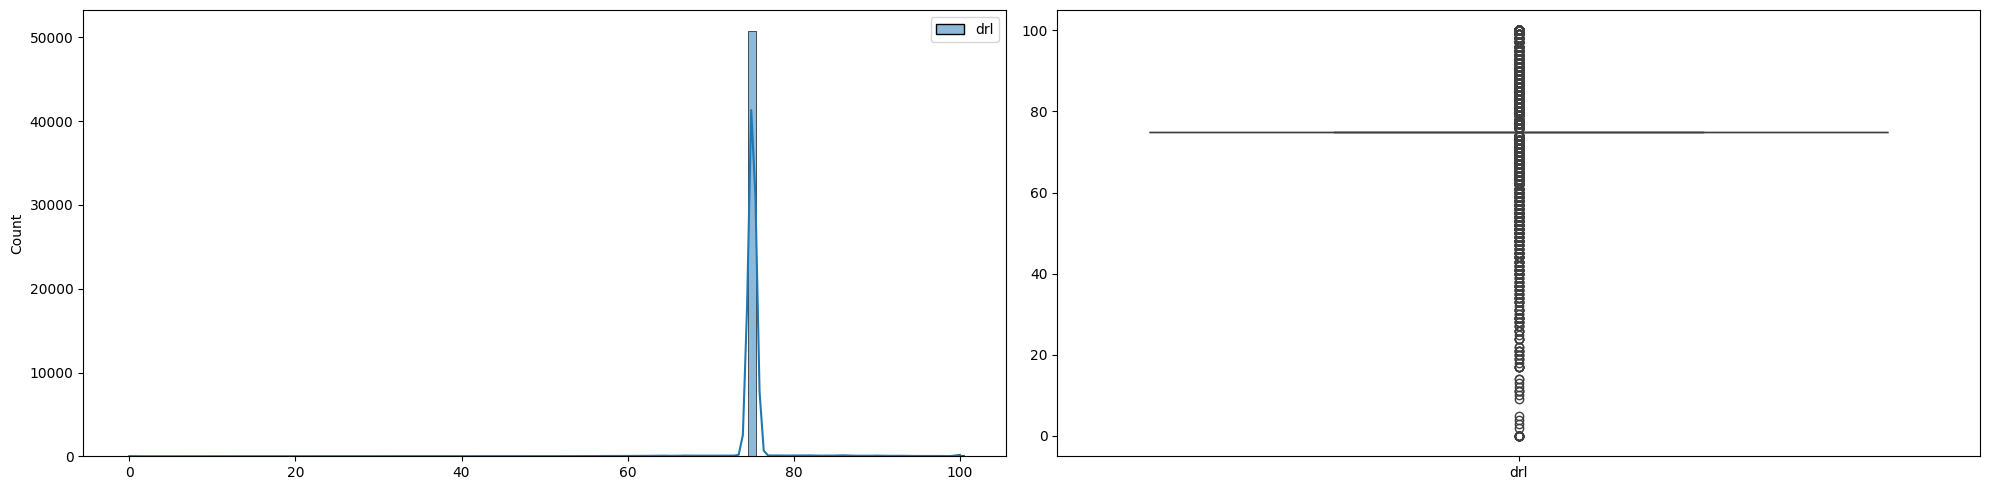

In [131]:
# Trực quan hóa phân bố dữ liệu của các cột dữ liệu liên tục
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.histplot(drl_df[drl_continuous_feature], kde=True, discrete=True)
plt.subplot(1,2,2)
sns.boxplot(drl_df[drl_continuous_feature])
plt.tight_layout()
plt.show()

In [132]:
# Chuyển các dữ liệu rời rạc về kiểu chuỗi
for col in drl_categorical_feature:
    drl_df[col] = drl_df[col].apply(lambda x: str(x))

In [133]:
# Xóa các ký tự đặc biệt của các dữ liệu rời rạc
for col in drl_categorical_feature:
    drl_df[col] = drl_df[col].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s\.]', '', x))

In [134]:
# Xác định các giá trị đặc trưng của dữ liệu rời rạc
# Đồng thời xác định các cột dữ liệu rời rạc đang chứa dữ liệu nhiễu
drl_df[drl_categorical_feature].apply(lambda x: len(x.unique()))

lopsh     128
hocky       2
namhoc      9
ghichu    113
dtype: int64

In [135]:
drl_df['nganhhoc'] = drl_df['lopsh'].apply(lambda x: re.sub(r'[^a-zA-Z]', '', x))

In [136]:
drl_df.head()

,id,mssv,lopsh,hocky,namhoc,drl,ghichu,nganhhoc
0,27.0,599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V,ANTN2013,2.0,2013.0,59.0,NULL,ANTN
1,28.0,FC77E598XPvAibaEXe879+AOg1gh8pb/q8KzJ2A3,ANTN2013,2.0,2013.0,91.0,NULL,ANTN
2,29.0,51E1C3E0XPvAibaEXe+4hxKfaQWuhLp2zzmiiyRe,ANTN2013,2.0,2013.0,93.0,NULL,ANTN
3,30.0,6920B9AAXPvAibaEXe83EtiN4MI2ns6NZhlUAIhE,ANTN2013,2.0,2013.0,69.0,NULL,ANTN
4,31.0,2F237AA9XPvAibaEXe/YKAlYnC3m967dOM4WK2IJ,ANTN2013,2.0,2013.0,72.0,NULL,ANTN


In [137]:
# Thay ' NULL' bằng ' ' để thống nhất việc nội dung ghi chú là rỗng 
drl_df['ghichu'] = drl_df['ghichu'].replace(' NULL', ' ')

In [138]:
drl_df.head()

,id,mssv,lopsh,hocky,namhoc,drl,ghichu,nganhhoc
0,27.0,599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V,ANTN2013,2.0,2013.0,59.0,,ANTN
1,28.0,FC77E598XPvAibaEXe879+AOg1gh8pb/q8KzJ2A3,ANTN2013,2.0,2013.0,91.0,,ANTN
2,29.0,51E1C3E0XPvAibaEXe+4hxKfaQWuhLp2zzmiiyRe,ANTN2013,2.0,2013.0,93.0,,ANTN
3,30.0,6920B9AAXPvAibaEXe83EtiN4MI2ns6NZhlUAIhE,ANTN2013,2.0,2013.0,69.0,,ANTN
4,31.0,2F237AA9XPvAibaEXe/YKAlYnC3m967dOM4WK2IJ,ANTN2013,2.0,2013.0,72.0,,ANTN


In [139]:
drl_df[drl_categorical_feature].describe()

,lopsh,hocky,namhoc,ghichu
count,54001,54001,54001,54001
unique,128,2,9,112
top,KTPM2013,1.0,2019.0,
freq,1236,30434,11664,48781


In [140]:
drl_categorical_feature.extend(['nganhhoc'])
drl_categorical_plot_feature = drl_categorical_feature.copy()
drl_categorical_plot_feature.remove('lopsh')

In [141]:
print(drl_categorical_plot_feature)

['hocky', 'namhoc', 'ghichu', 'nganhhoc']


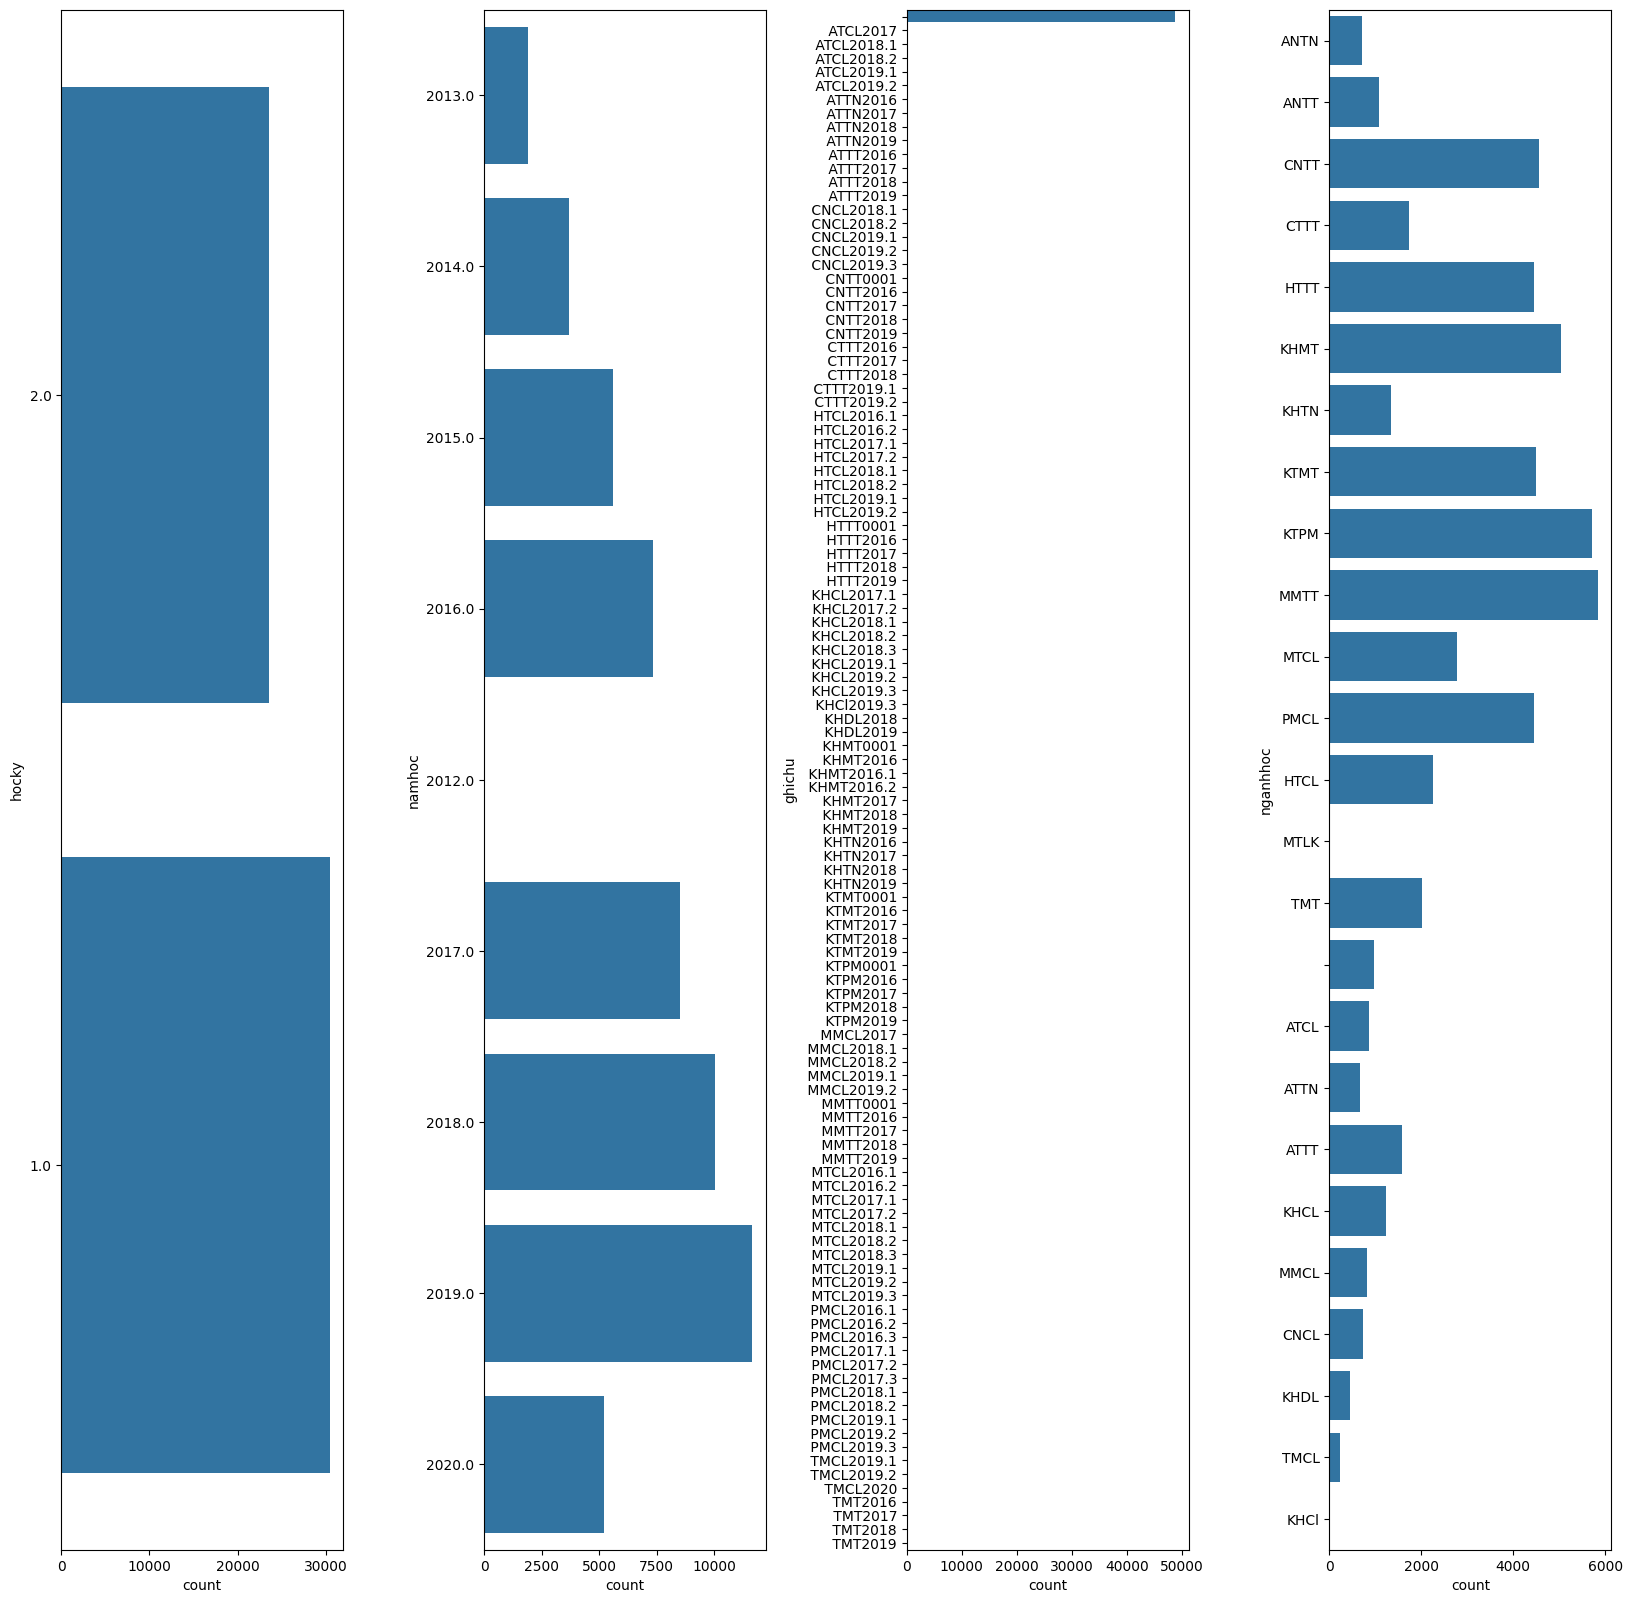

In [142]:
# Trực quan hóa tần suất các giá trị đặc trưng dữ liệu rời rạc
col = 4
row = int(math.ceil(len(drl_categorical_plot_feature) / col))
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0.5, hspace=0.2)
for index, df_col in enumerate(drl_categorical_plot_feature):
    plt.subplot(row, col, index + 1)
    sns.countplot(drl_df[df_col])
plt.show()

In [181]:
# Chuyển đổi với xử lý lỗi và thay thế NaN bằng 0 (hoặc giá trị khác)
drl_df['hocky'] = pd.to_numeric(drl_df['hocky'], errors='coerce').fillna(0).astype(int)
drl_df['namhoc'] = pd.to_numeric(drl_df['namhoc'], errors='coerce').fillna(0).astype(int)


In [183]:
# Xuất dữ liệu sau khi xử lý
drl_df.to_excel("processed_10_diemrl.xlsx")

# ** 12.baoluu **

In [144]:
# Xác định các cột dữ liệu
bl_df.columns = bl_df.columns.str.strip() # xóa bỏ khoảng trắng thừa trong tên các cột
bl_cols = bl_df.columns.to_list()
bl_df.head()

,id,masv,tinhtrang,lydo,hocky,namhoc,soqd,ngayqd
0,7532.0,E95E7C6DXPvAibaEXe+1j/AqdkpM22DHf6P99fDJ,3.0,TN,2.0,2016.0,178 /QĐ-ĐHCNTT,2017-04-14
1,8304.0,EBC8A649XPvAibaEXe+fmxcqgvribIboSP1ToKmG,3.0,,1.0,2017.0,713/QD-DHCNTT,2017-10-06
2,8305.0,2ABBE719XPvAibaEXe9hPQQhQOOPyUJ9WJU9hlCM,3.0,,1.0,2017.0,713/QD-DHCNTT,2017-10-06
3,8306.0,C307F053XPvAibaEXe+nZBq3b0XEhX8PABYu6iV1,3.0,,1.0,2017.0,713/QD-DHCNTT,2017-10-06
4,8307.0,F99CE6DEXPvAibaEXe86736b6Ol+/O3ZQU1AW1/C,3.0,,1.0,2017.0,713/QD-DHCNTT,2017-10-06


In [145]:
# Xác định kiểu dữ liệu
bl_df.dtypes

id                  float64
masv                 object
tinhtrang           float64
lydo                 object
hocky               float64
namhoc              float64
soqd                 object
ngayqd       datetime64[ns]
dtype: object

In [146]:
# Tìm kiếm và xóa bỏ các dòng giá trị trống
print(bl_df.isnull().sum())
bl_df = bl_df.dropna(how='all')
print(bl_df.isnull().sum())

id           2
masv         2
tinhtrang    2
lydo         2
hocky        2
namhoc       2
soqd         2
ngayqd       2
dtype: int64
id           0
masv         0
tinhtrang    0
lydo         0
hocky        0
namhoc       0
soqd         0
ngayqd       0
dtype: int64


In [147]:
bl_cols

['id', 'masv', 'tinhtrang', 'lydo', 'hocky', 'namhoc', 'soqd', 'ngayqd']

In [148]:
# Xác định các trường dữ liệu liên tục và rời rạc
bl_continuous_feature = []
bl_categorical_feature = ['tinhtrang', 'lydo', 'hocky', 'namhoc', 'soqd', 'ngayqd']

In [149]:
# Chuyển các dữ liệu rời rạc về kiểu chuỗi
for col in bl_categorical_feature:
    bl_df[col] = bl_df[col].apply(lambda x: str(x))

In [150]:
bl_df['lydo'].unique()

array([' TN', ' ',
       ' Chứng chỉ Anh văn không đạt --> CNTN tốt nghiệp chuyển sang hệ CQĐT',
       ' QĐ điều chỉnh ngành TN', ' Tốt nghiệp'], dtype=object)

In [151]:
bl_df['lydo'] = bl_df['lydo'].replace(' TN', ' Tốt nghiệp')

In [152]:
bl_df['lydo'].unique()

array([' Tốt nghiệp', ' ',
       ' Chứng chỉ Anh văn không đạt --> CNTN tốt nghiệp chuyển sang hệ CQĐT',
       ' QĐ điều chỉnh ngành TN'], dtype=object)

In [153]:
bl_df.head()

,id,masv,tinhtrang,lydo,hocky,namhoc,soqd,ngayqd
0,7532.0,E95E7C6DXPvAibaEXe+1j/AqdkpM22DHf6P99fDJ,3.0,Tốt nghiệp,2.0,2016.0,178 /QĐ-ĐHCNTT,2017-04-14 00:00:00
1,8304.0,EBC8A649XPvAibaEXe+fmxcqgvribIboSP1ToKmG,3.0,,1.0,2017.0,713/QD-DHCNTT,2017-10-06 00:00:00
2,8305.0,2ABBE719XPvAibaEXe9hPQQhQOOPyUJ9WJU9hlCM,3.0,,1.0,2017.0,713/QD-DHCNTT,2017-10-06 00:00:00
3,8306.0,C307F053XPvAibaEXe+nZBq3b0XEhX8PABYu6iV1,3.0,,1.0,2017.0,713/QD-DHCNTT,2017-10-06 00:00:00
4,8307.0,F99CE6DEXPvAibaEXe86736b6Ol+/O3ZQU1AW1/C,3.0,,1.0,2017.0,713/QD-DHCNTT,2017-10-06 00:00:00


In [154]:
bl_df['ngayqd'] = bl_df['ngayqd'].str.replace(r'\s*0+$', '', regex=True)

In [178]:
bl_df['ngayqd'] = bl_df['ngayqd'].str.replace(r'\s*0+$', '', regex=True)

In [179]:
bl_df.head()

,id,masv,tinhtrang,lydo,hocky,namhoc,soqd,ngayqd
0,7532.0,E95E7C6DXPvAibaEXe+1j/AqdkpM22DHf6P99fDJ,3.0,Tốt nghiệp,2.0,2016.0,178 /Q-HCNTT,2017-04-14
1,8304.0,EBC8A649XPvAibaEXe+fmxcqgvribIboSP1ToKmG,3.0,,1.0,2017.0,713/QD-DHCNTT,2017-10-06
2,8305.0,2ABBE719XPvAibaEXe9hPQQhQOOPyUJ9WJU9hlCM,3.0,,1.0,2017.0,713/QD-DHCNTT,2017-10-06
3,8306.0,C307F053XPvAibaEXe+nZBq3b0XEhX8PABYu6iV1,3.0,,1.0,2017.0,713/QD-DHCNTT,2017-10-06
4,8307.0,F99CE6DEXPvAibaEXe86736b6Ol+/O3ZQU1AW1/C,3.0,,1.0,2017.0,713/QD-DHCNTT,2017-10-06


In [157]:
# Xóa các ký tự hong hợp lệ của các dữ liệu rời rạc
for col in bl_categorical_feature:
    if col == 'lydo': continue
    bl_df[col] = bl_df[col].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s\./-]', '', x))

In [158]:
# Xác định các giá trị đặc trưng của dữ liệu rời rạc
# Đồng thời xác định các cột dữ liệu rời rạc đang chứa dữ liệu nhiễu
bl_df[bl_categorical_feature].apply(lambda x: len(x.unique()))

tinhtrang     1
lydo          4
hocky         3
namhoc        5
soqd         45
ngayqd       43
dtype: int64

In [159]:
# Thống kê mô tả cơ bản dữ liệu rời rạc
bl_df[bl_categorical_feature].describe()

,tinhtrang,lydo,hocky,namhoc,soqd,ngayqd
count,1878,1878,1878,1878,1878,1878
unique,1,4,3,5,45,43
top,3.0,,1.0,2020.0,542/Q-HCNTT,2020-08-31 0000
freq,1878,1666,909,726,204,204


In [160]:
bl_categorical_plot_feature = bl_categorical_feature.copy()

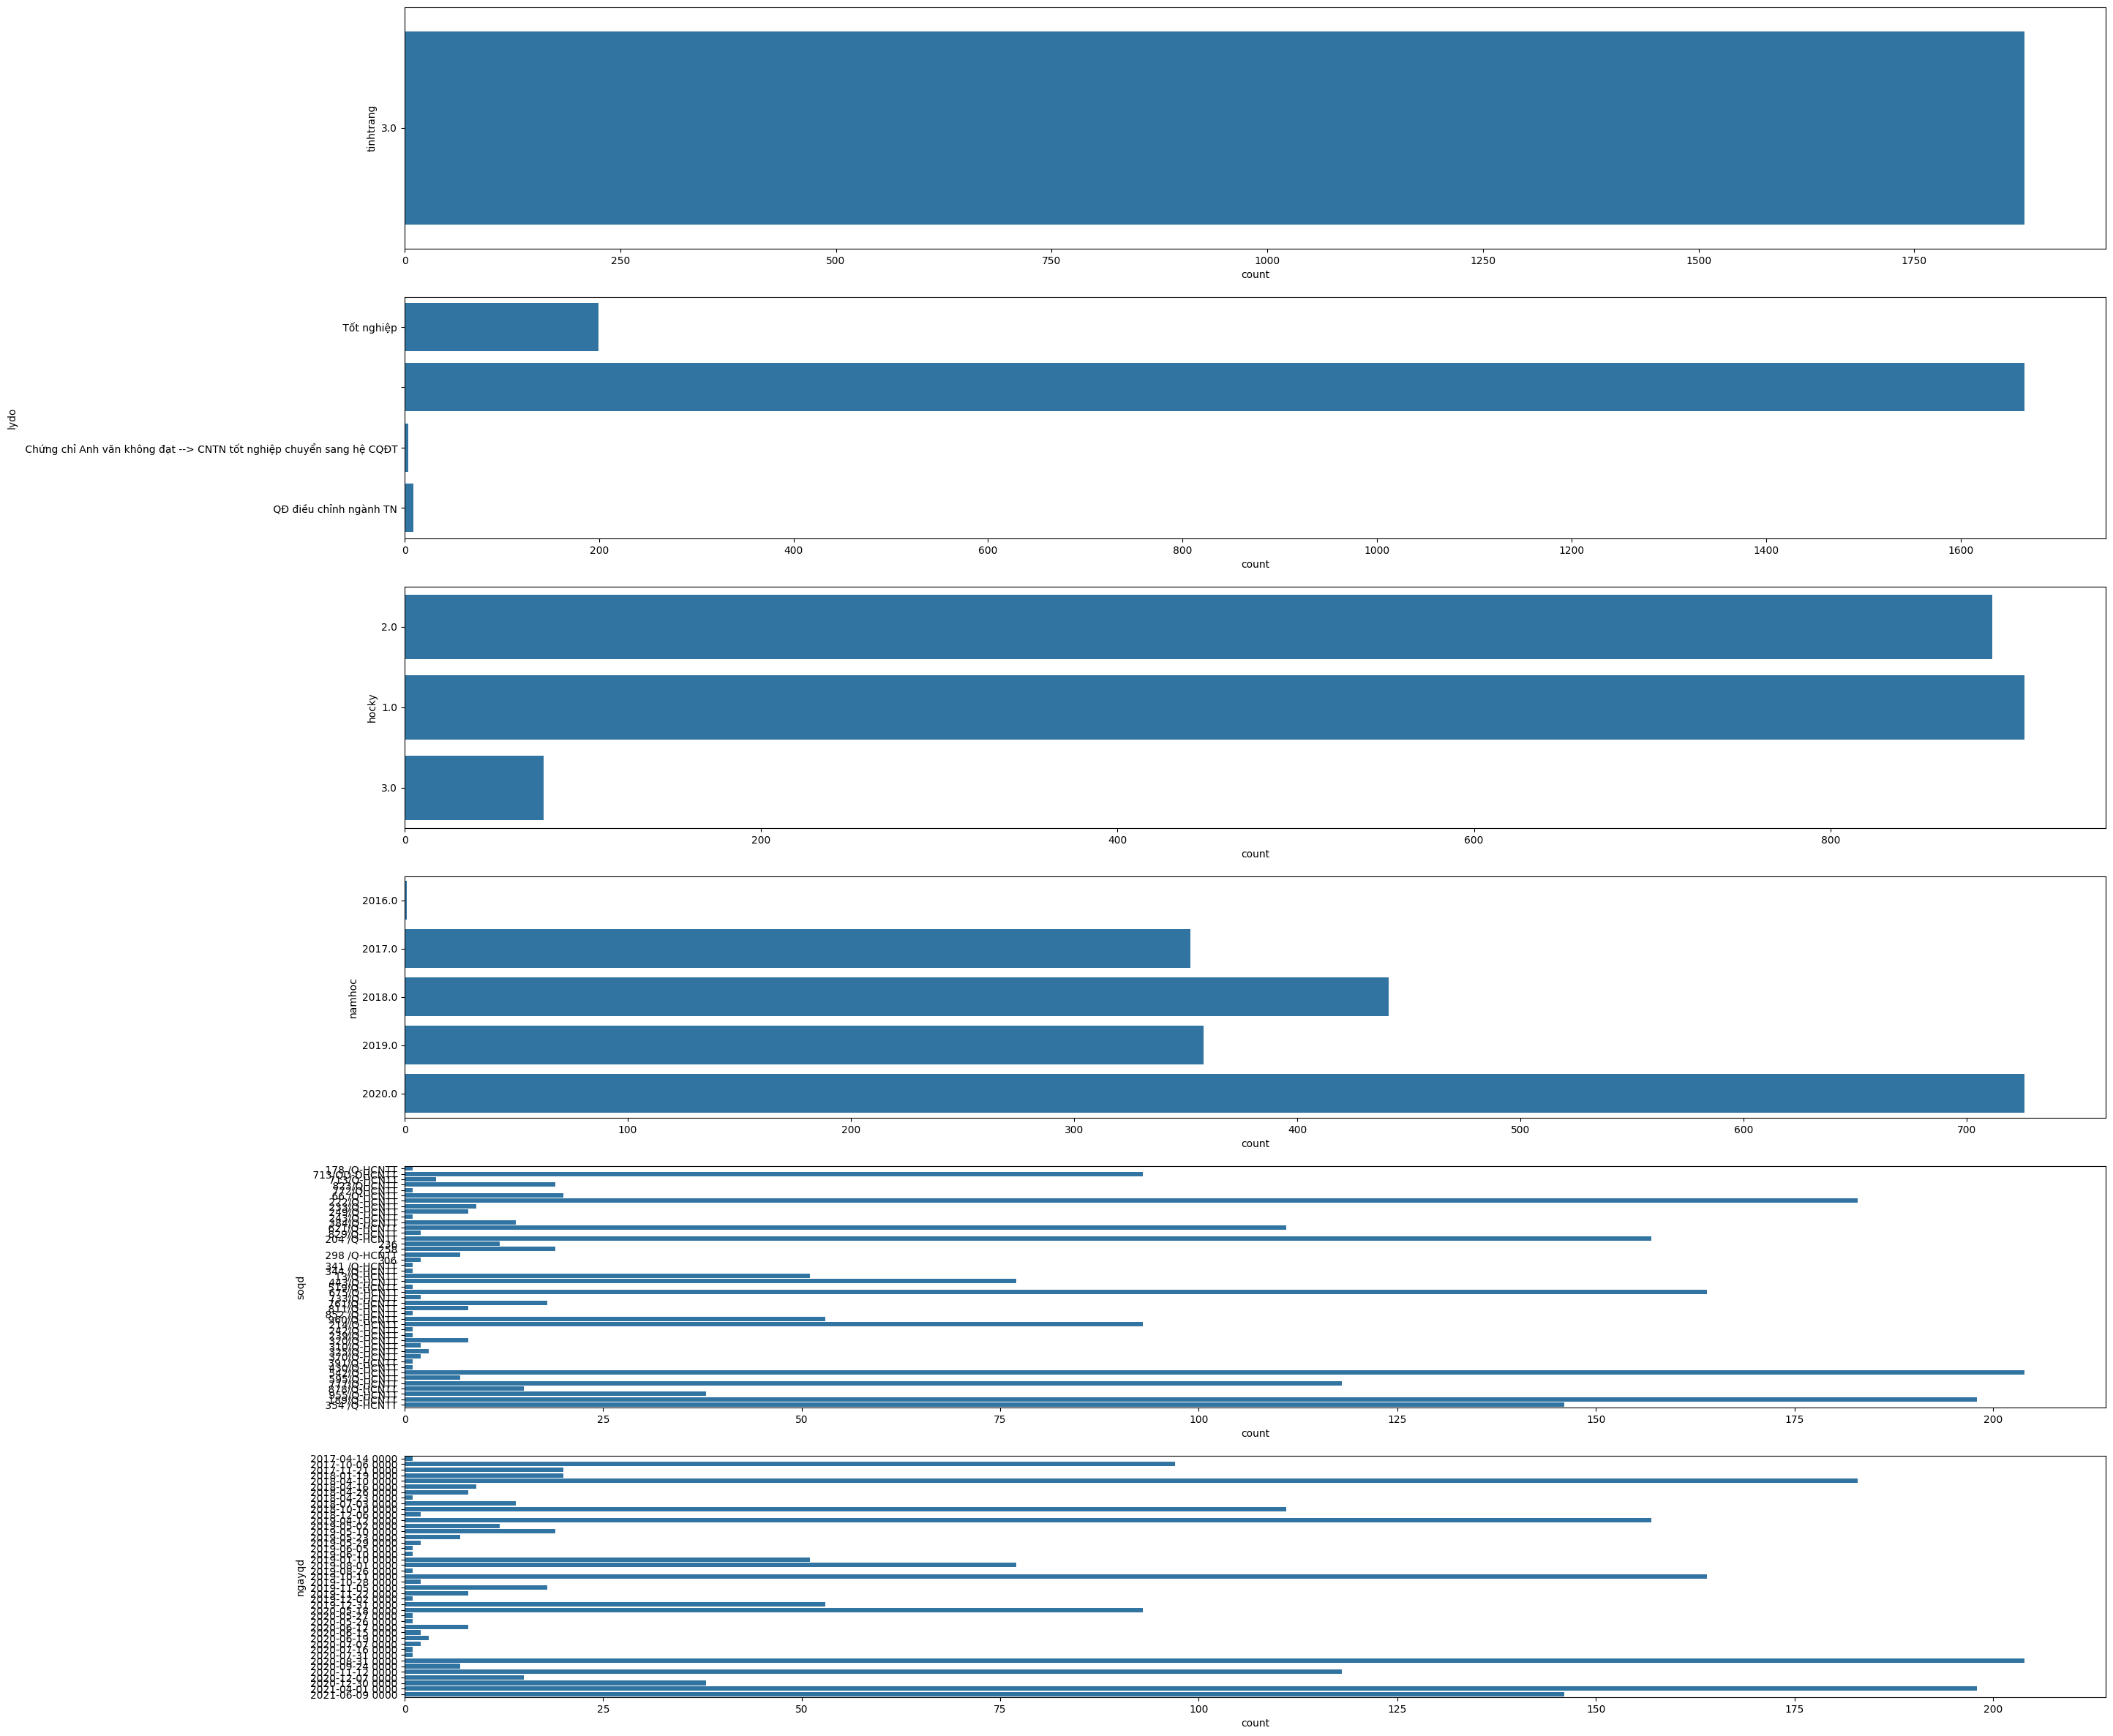

In [161]:
# Trực quan hóa tần suất các giá trị đặc trưng dữ liệu rời rạc
col = 1
row = int(math.ceil(len(bl_categorical_plot_feature) / col))
plt.figure(figsize=(30,30))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
for index, df_col in enumerate(bl_categorical_plot_feature):
    plt.subplot(row, col, index + 1)
    sns.countplot(bl_df[df_col])
plt.show()

In [184]:
bl_df['tinhtrang'] = pd.to_numeric(bl_df['tinhtrang'], errors='coerce').astype('Int64')
bl_df['hocky'] = pd.to_numeric(bl_df['hocky'], errors='coerce').astype('Int64')
bl_df['namhoc'] = pd.to_numeric(bl_df['namhoc'], errors='coerce').astype('Int64')


In [185]:
# Xuất dữ liệu sau khi xử lý
bl_df.to_excel("processed_12_baoluu.xlsx")

# ** 14.totnghiep **

In [163]:
# Xác định các cột dữ liệu
tn_df.columns = tn_df.columns.str.strip() # xóa bỏ khoảng trắng thừa trong tên các cột
tn_cols = tn_df.columns.to_list()
tn_df.head()

,id,mssv,xeploai,soquyetdinh,ngaycapvb
0,76328.0,E95E7C6DXPvAibaEXe+1j/AqdkpM22DHf6P99fDJ,Khá,178/QĐ_ĐHCNTT,14/04/2017
1,76663.0,D0FE4969XPvAibaEXe/yXiKgsgy0slCmJ5EKt6Ki,Giỏi,713/QĐ_ĐHCNTT,06/10/2017
2,76664.0,40F7E8D0XPvAibaEXe+nZBq3b0XEhfcwXLmoc4Pj,Giỏi,713/QĐ_ĐHCNTT,06/10/2017
3,76665.0,0A049F45XPvAibaEXe9CtFSNMbfIz9qE7i0Fu4My,Khá,713/QĐ_ĐHCNTT,06/10/2017
4,76666.0,7A7166DAXPvAibaEXe83V/kFvw2bBZ0o/KVHZc30,Khá,713/QĐ_ĐHCNTT,06/10/2017


In [164]:
# Xác định kiểu dữ liệu
tn_df.dtypes

id             float64
mssv            object
xeploai         object
soquyetdinh     object
ngaycapvb       object
dtype: object

In [165]:
# Tìm kiếm và xóa bỏ các dòng giá trị trống
print(tn_df.isnull().sum())
tn_df = tn_df.dropna(how='all')
print(tn_df.isnull().sum())

id             2
mssv           2
xeploai        2
soquyetdinh    2
ngaycapvb      2
dtype: int64
id             0
mssv           0
xeploai        0
soquyetdinh    0
ngaycapvb      0
dtype: int64


In [166]:
tn_cols

['id', 'mssv', 'xeploai', 'soquyetdinh', 'ngaycapvb']

In [167]:
# Xác định các trường dữ liệu liên tục và rời rạc
tn_continuous_feature = []
tn_categorical_feature = ['xeploai', 'soquyetdinh', 'ngaycapvb']

In [168]:
# Chuyển các dữ liệu rời rạc về kiểu chuỗi
for col in tn_categorical_feature:
    tn_df[col] = tn_df[col].apply(lambda x: str(x))

In [169]:
tn_df['xeploai'].unique()

array([' Khá', ' Giỏi', ' Trung bình khá', ' Xuất sắc', ' Trung bình Khá',
       ' TB Khá', ' TB khá'], dtype=object)

In [170]:
tn_df['xeploai'] = tn_df['xeploai'].replace([' Trung bình Khá', ' TB Khá', ' TB khá'], ' Trung bình khá')


In [171]:
tn_df['xeploai'].unique()

array([' Khá', ' Giỏi', ' Trung bình khá', ' Xuất sắc'], dtype=object)

In [172]:
# Xóa các ký tự hong hợp lệ của các dữ liệu rời rạc
for col in tn_categorical_feature[1:]:
    tn_df[col] = tn_df[col].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s\./-]', '', x))

In [173]:
# Xác định các giá trị đặc trưng của dữ liệu rời rạc
# Đồng thời xác định các cột dữ liệu rời rạc đang chứa dữ liệu nhiễu
tn_df[tn_categorical_feature].apply(lambda x: len(x.unique()))

xeploai         4
soquyetdinh    43
ngaycapvb      43
dtype: int64

In [174]:
# Thống kê mô tả cơ bản dữ liệu rời rạc
tn_df[tn_categorical_feature].describe()

,xeploai,soquyetdinh,ngaycapvb
count,1845,1845,1845
unique,4,43,43
top,Khá,542/QHCNTT,31/08/2020
freq,1125,204,204


In [175]:
tn_categorical_plot_feature = tn_categorical_feature.copy()

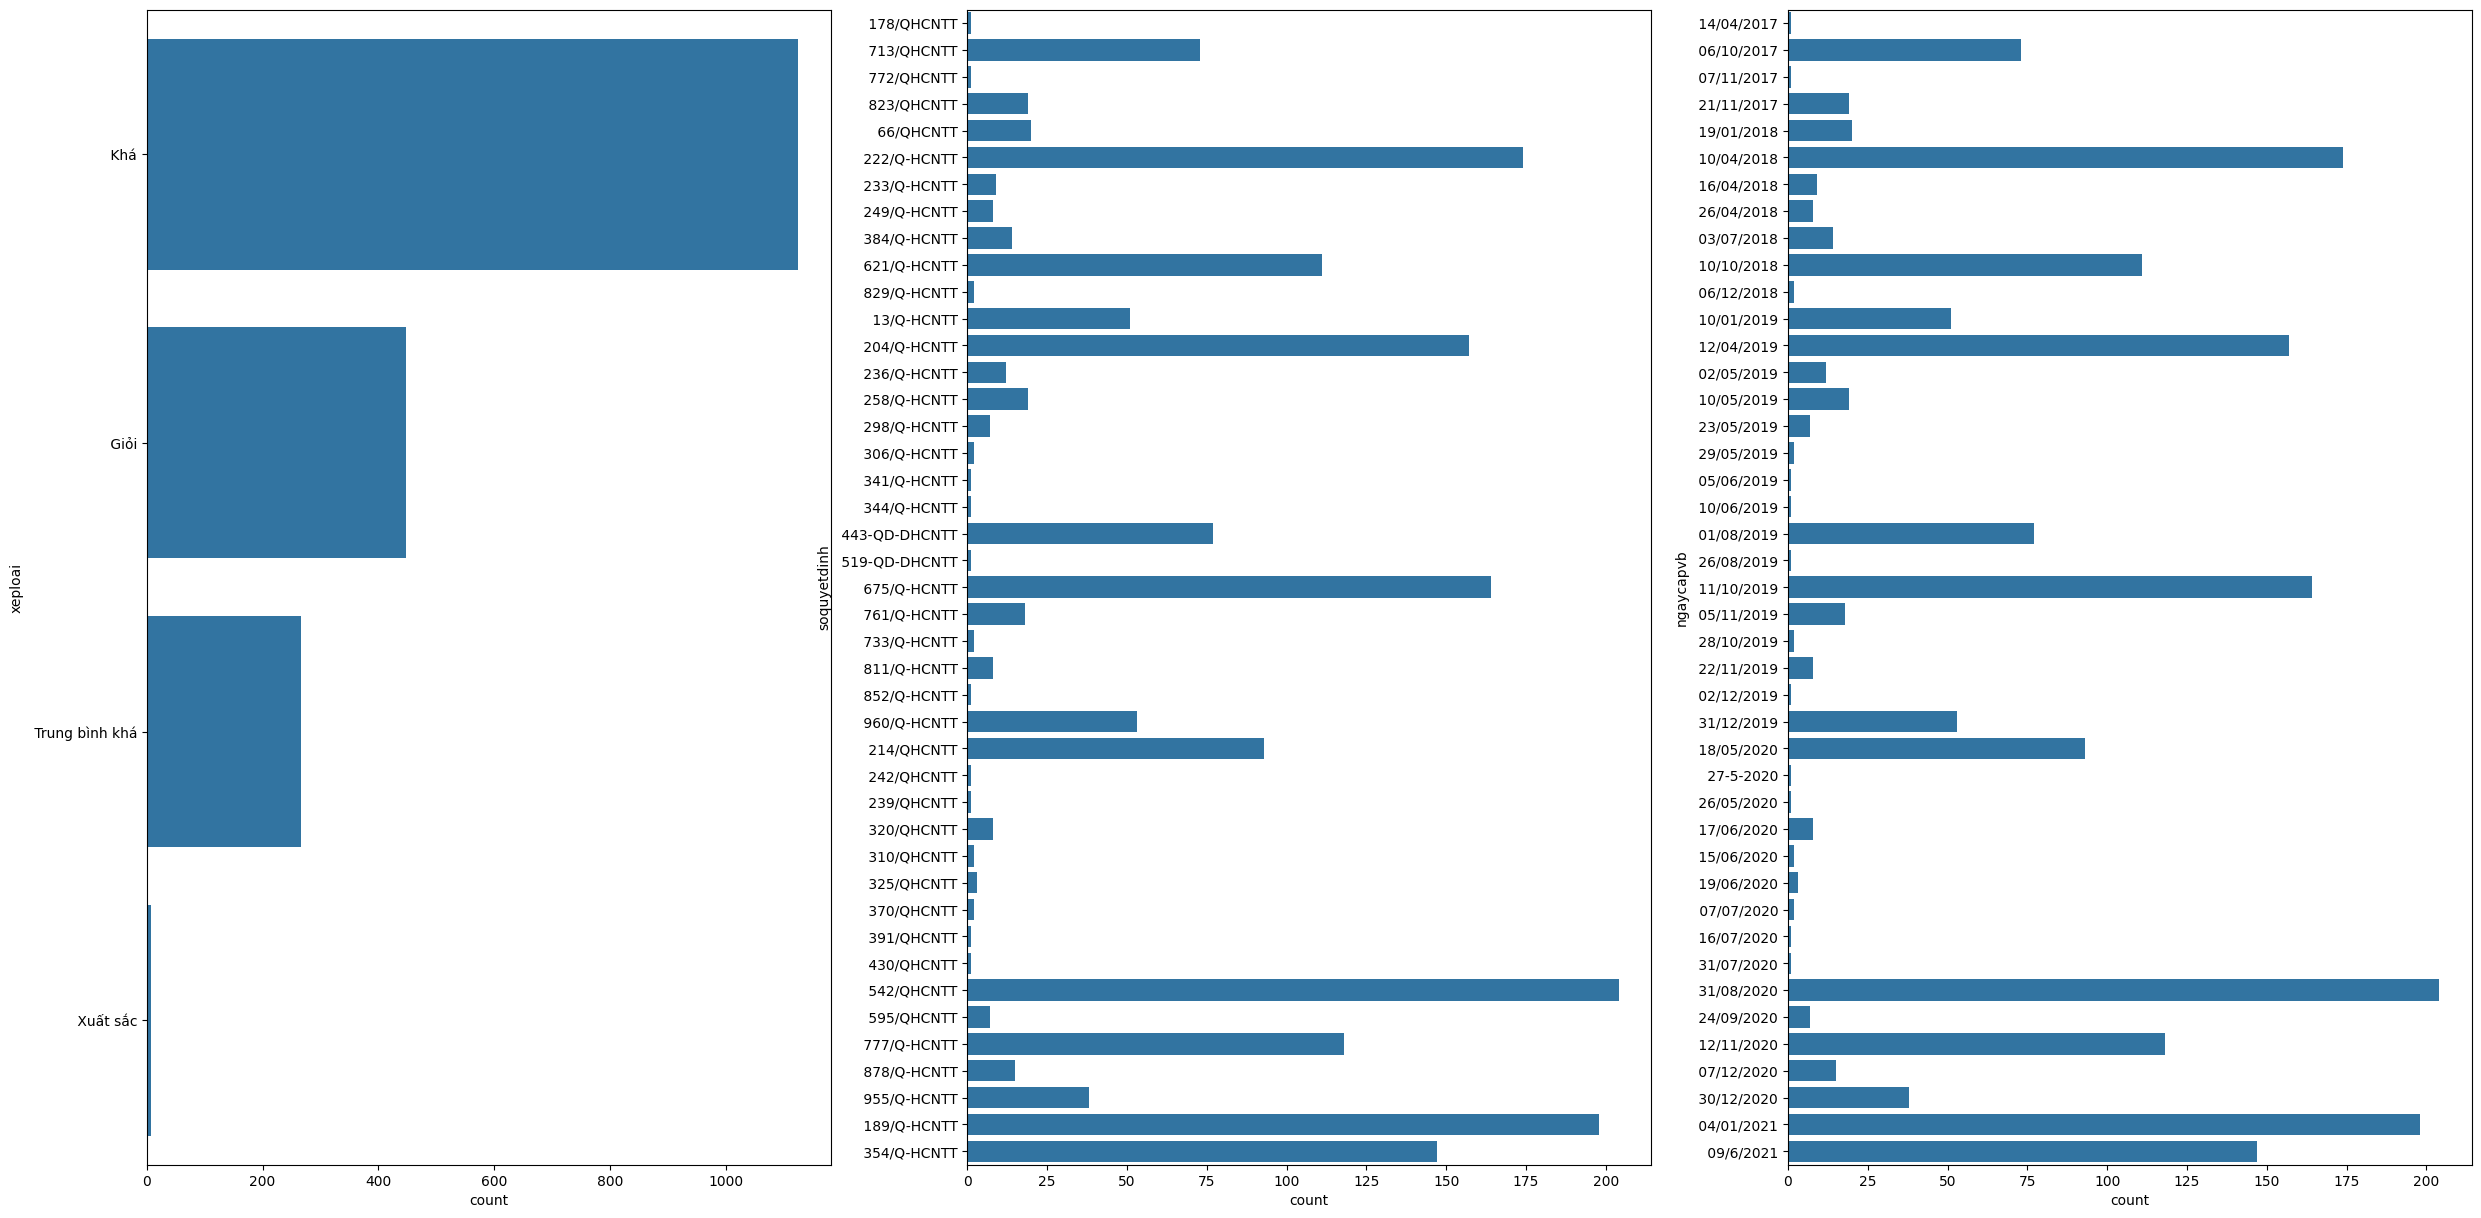

In [176]:
# Trực quan hóa tần suất các giá trị đặc trưng dữ liệu rời rạc
col = 3
row = int(math.ceil(len(tn_categorical_plot_feature) / col))
plt.figure(figsize=(30,15))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
for index, df_col in enumerate(tn_categorical_plot_feature):
    plt.subplot(row, col, index + 1)
    sns.countplot(tn_df[df_col])
plt.show()

In [177]:
# Xuất dữ liệu sau khi xử lý
tn_df.to_excel("processed_14_totnghiep.xlsx")